In [6]:
from keras.utils import image_dataset_from_directory, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers.experimental.preprocessing import Rescaling

import matplotlib.pyplot as plt

Константы

In [9]:
# IMAGE_SIZE = (64, 64)
IMAGE_SIZE = (150, 150)

In [3]:
train_path = '../dataset/chest_xray/train'
val_path = '../dataset/chest_xray/val'
test_path = '../dataset/chest_xray/test'

In [10]:
train, train_val = image_dataset_from_directory(train_path, image_size=IMAGE_SIZE, subset="both", validation_split=0.2, seed=11)
test = image_dataset_from_directory(test_path, image_size=IMAGE_SIZE)
val_dataset = image_dataset_from_directory(val_path, image_size=IMAGE_SIZE)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Using 1043 files for validation.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


Нормализация датасета

In [11]:
rescale = Rescaling(scale=1.0 / 255)

train = train.map(lambda image, label: (rescale(image), label))
train_val = train_val.map(lambda image, label: (rescale(image), label))
val_dataset  = val_dataset.map(lambda image, label: (rescale(image), label))
test  = test.map(lambda image, label: (rescale(image), label))

Создание модели

In [14]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

Компиляция модели

In [130]:
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [15]:
hist = model.fit(train, validation_data=(train_val), epochs=12, batch_size=32)

Epoch 1/12
131/131 [==============================] - 326s 2s/step - loss: 0.4832 - accuracy: 0.8919 - val_loss: 4.2271 - val_accuracy: 0.7440
Epoch 2/12
131/131 [==============================] - 340s 3s/step - loss: 0.1483 - accuracy: 0.9499 - val_loss: 2.9585 - val_accuracy: 0.7440
Epoch 3/12
131/131 [==============================] - 361s 3s/step - loss: 0.1055 - accuracy: 0.9650 - val_loss: 7.2282 - val_accuracy: 0.7440
Epoch 4/12
131/131 [==============================] - 381s 3s/step - loss: 0.0786 - accuracy: 0.9732 - val_loss: 2.4656 - val_accuracy: 0.7526
Epoch 5/12
131/131 [==============================] - 419s 3s/step - loss: 0.0635 - accuracy: 0.9796 - val_loss: 0.7558 - val_accuracy: 0.8456
Epoch 6/12
131/131 [==============================] - 441s 3s/step - loss: 0.0522 - accuracy: 0.9844 - val_loss: 0.1773 - val_accuracy: 0.9377
Epoch 7/12
131/131 [==============================] - 408s 3s/step - loss: 0.0416 - accuracy: 0.9842 - val_loss: 0.1090 - val_accuracy: 0.9664

In [16]:
train_acc = max(hist.history['accuracy'])
test_loss, test_acc = model.evaluate(test)

20/20 [==============================] - 15s 513ms/step - loss: 6.8495 - accuracy: 0.6538


In [17]:
def score_plot():
    plt.bar(['train', 'test'], [train_acc, test_acc], color=['#069AF3', 'orange'])
    plt.title(f'Score')
    plt.show()

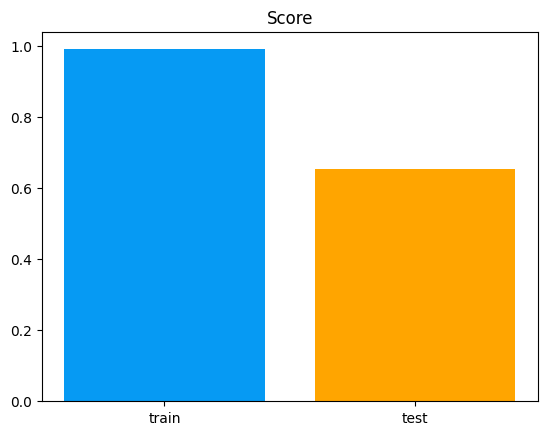

In [18]:
score_plot()

Сохранение модели

In [19]:
test_score = int(round(test_acc * 100, 0))

model.save(f"../models/cnn{test_score}.h5")